In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit

In [14]:
import pandas as pd
df = pd.read_excel('data231214.xlsx')
df

,Global,filename_global,Counter,filename_counter
0,1,ramsey_co_prop_rfsoc_timescan_002,1.0,ramsey_counter_prop_rfsoc_timescan_006
1,2,ramsey_co_prop_rfsoc_timescan_003,NaN,NaN
2,3,ramsey_co_prop_rfsoc_timescan_004,NaN,NaN


In [15]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion3, ion3_raw, ion3_bottom, ion3_top, ion4, ion4_raw, ion4_bottom, \
    ion4_top, ion5, ion5_raw, ion5_bottom, ion5_top, ion2, ion2_raw, ion2_bottom, ion2_top, ion6, ion6_raw, \
    ion6_bottom, ion6_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion4

In [16]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

The fitting function is
$$
A\cos{(2\pi t/T+\phi)} \times exp(-t/\tau -\beta t^2) + B
$$
where $\delta = 1/T$ is the detuning frequency, $\tau$ is the coherence time

In [17]:
def func(t, A, phi, T, tau):
    return A/2*np.cos(t/T*2*np.pi+phi)*np.exp(-t/tau)+0.5

In [18]:
def FitRamsey(xdata, ydata, guess=[1,0.1*np.pi, 80000, 500000]):
    popt, pcov = curve_fit(func, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100)+0.0001,\
                          bounds=([0.0,-np.pi, 0., 0.],[1.0, np.pi, 1e8, 1e8]))
    plt.figure(figsize=(10,6))
    tlist = np.linspace(min(xdata), max(xdata), 101)
    plt.plot(tlist, func(tlist, *popt), 'b-', label='fit: tau=%5.3f' % popt[3])
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100),\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
    plt.legend()
    plt.ylim([-0.05,1.05])
    plt.xlabel('Wait time (us)')
    plt.ylabel('Population')
    print(popt)
    print('sigma_tau = ', np.sqrt(np.diag(pcov)[3]))
    return popt, np.sqrt(np.diag(pcov)[3])

# Global co-prop

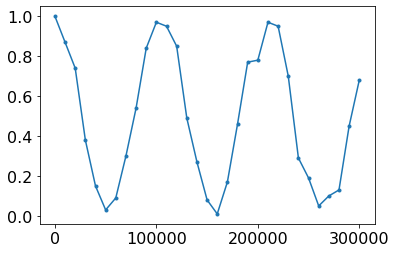

In [19]:
filename = df['filename_global'][0]
time1, global1 = readFile(filename)
plt.plot(time1, global1, '.-')

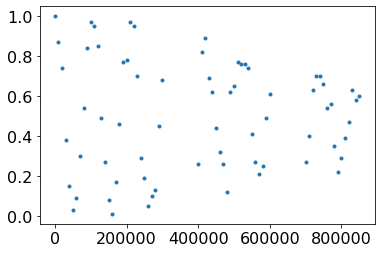

In [23]:
time_global = np.empty((0, 0))
ramsey_global = np.empty((0, 0))
for i in [0,1,2]:
    filename = df['filename_global'][i]
    t, ramsey = readFile(filename)
    time_global = np.append(time_global, t)
    ramsey_global = np.append(ramsey_global, ramsey)
plt.plot(time_global, ramsey_global, '.')

[ 1.00000000e+00 -9.30510885e-04  1.05263705e+05  1.24887839e+06]
sigma_tau =  168370.52014450438


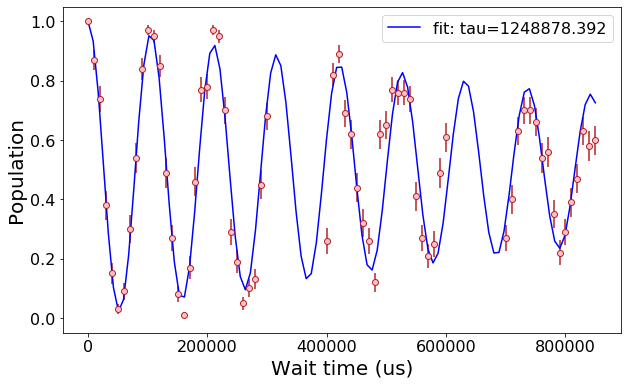

In [24]:
xdata = time_global
ydata = ramsey_global
guess=[1,0.1*np.pi, 80000, 500000]
popt, sigma_A = FitRamsey(xdata, ydata, guess)

# Counter-prop

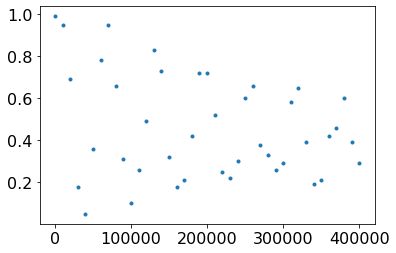

In [25]:
time_counter = np.empty((0, 0))
ramsey_counter = np.empty((0, 0))
for i in [0]:
    filename = df['filename_counter'][i]
    t, ramsey = readFile(filename)
    time_counter = np.append(time_counter, t)
    ramsey_counter = np.append(ramsey_counter, ramsey)
plt.plot(time_counter, ramsey_counter, '.')

[ 1.00000000e+00 -5.07735772e-01  6.28039663e+04  3.59637160e+05]
sigma_tau =  70823.80178122141


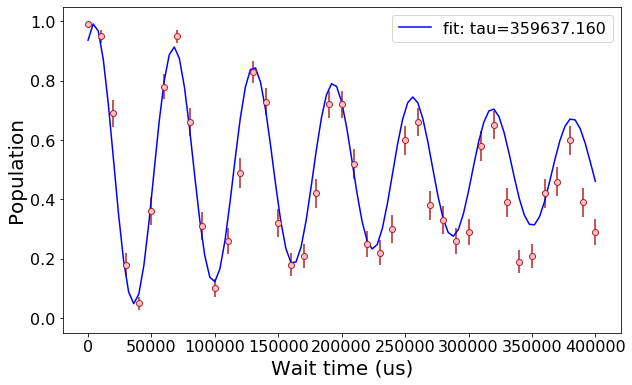

In [26]:
xdata = time_counter
ydata = ramsey_counter
guess=[1,0.1*np.pi, 60000, 200000]
popt, sigma_tau = FitRamsey(xdata, ydata, guess)